In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."

In [3]:
tabla_1 = pd.read_csv(BASE_DIR + "/input/wtageinf.csv")
tabla_1.head(10)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [4]:
tabla_1.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [5]:
tabla_1.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

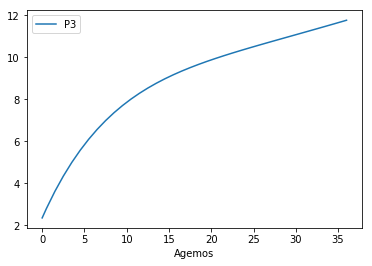

In [6]:
filtrado= tabla_1[tabla_1.Sex==1]
filtrado.plot(x='Agemos', y='P3');

<font color='green'>**Ejercicio 1: Tablas de Crecimiento**</font>
* Graficar las curvas correspondientes a cada percentil para niños y niñas
* En la columna Sex, 1 representa a niños y 2 a niñas
* Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo gráfico.
* Un gráfico para cada sexo.

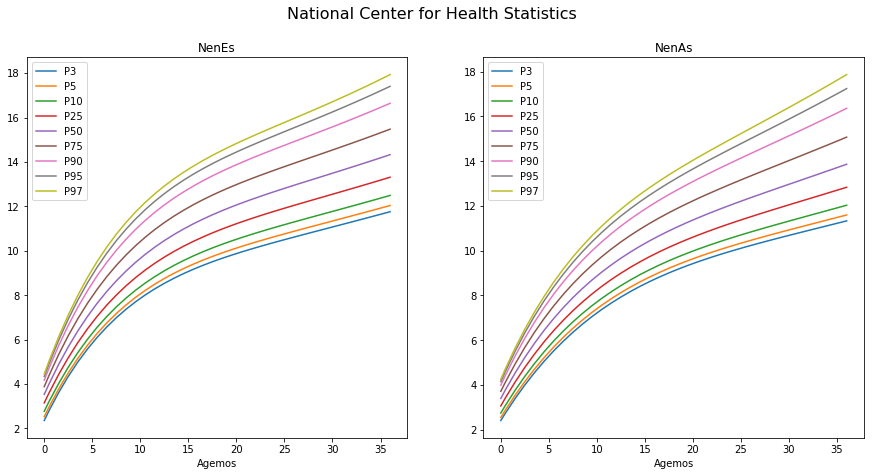

In [7]:
#Definiciones
percentiles=['P3', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P97']

f, axes = plt.subplots(1, 2, figsize=(15, 7))
f.suptitle('National Center for Health Statistics', fontsize=16)

tabla_1[tabla_1.Sex==1].plot(x='Agemos', y=percentiles, ax=axes[0], title='NenEs')
tabla_1[tabla_1.Sex==2].plot(x='Agemos', y=percentiles, ax=axes[1], title='NenAs')

<font color='green'>**Ejercicio 2: Pasos Fronterizos**</font>
* Graficar un histograma agrupando por valor del atributo “province”

In [8]:
dt = {'location': 'str', 'name':'str', 'province':'str'}

pasos_f= pd.read_json(BASE_DIR + "/input/pasos.json", dtype=dt, encoding='utf8')
pasos_f.shape

(252, 3)

In [9]:
pasos_f.sample(10)

,location,name,province
114,"[-33.7146367, -58.6583381]",PUERTO PARANACITO,Santa Fe
225,"[-26.216682, -58.2327793]",AERO FORMOSA,Formosa
151,"[-29.7321716, -57.1202727]",PASO DE LOS LIBRES,Corrientes
144,"[-33.2762671, -66.3564298]",AERO SAN LUIS,San Luis
194,"[-26.216682, -58.2327793]",AEROPUERTO INTERNACIONAL DE FORMOSA,Formosa
15,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...
167,"[-27.3732322, -57.6545305]",PUERTO YAHAPE,Corrientes
47,"[-39.5815859, -71.4673476]",PASO MAMUIL MALAL,Neuquen
48,"[-38.833809, -71.2745511]",PASO ICALMA,NEUQUEN
112,"[-33.3334669, -60.2110494]",PUERTO SAN NICOLAS,Buenos Aires


In [10]:
pasos_f.dtypes

location    object
name        object
province    object
dtype: object

**Verificamos las descripciones de las provincias**

In [11]:
pasos_f['province'].unique()

array(['Tierra del Fuego', 'Santa Cruz',
       'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
       'Chubut', 'Rio Negro', 'Neuquen', 'NEUQUEN', 'Buenos Aires',
       'Mendoza', 'San Luis', 'San Juan', 'Santa Fe', 'Córdoba',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

Vemos que hay un valor que está mal cargado, *AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ* debe ser *Santa Cruz*. Se debe uniformizar *Neuquen* con *NEUQUEN*, y *Córdoba* con *Cordoba*.

In [12]:
pasos_f.replace('Córdoba','Cordoba',inplace=True)
pasos_f.replace('AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ','Santa Cruz',inplace=True)
pasos_f.replace('NEUQUEN','Neuquen',inplace=True)

In [13]:
pasos_f['province'].unique()

array(['Tierra del Fuego', 'Santa Cruz', 'Chubut', 'Rio Negro', 'Neuquen',
       'Buenos Aires', 'Mendoza', 'San Luis', 'San Juan', 'Santa Fe',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

**Verificamos las posiciones geográficas**

In [14]:
pasos_f[pasos_f.location.duplicated(keep=False)].sort_values('location').head(10)

,location,name,province
220,"[-23.2375, -67.076389]",PASO DE JAMA,Jujuy
149,"[-23.2375, -67.076389]",JAMA NORTE,Catamarca
199,"[-24.8442303, -65.4806004]",AERO SALTA,Salta
197,"[-24.8442303, -65.4806004]",AEROPUERTO INTERNACIONAL MARTIN MIGUEL DE GUEMES,Salta
210,"[-25.3726325, -57.6514475]",PUERTO PILCOMAYO (PF),Formosa
209,"[-25.3726325, -57.6514475]",PUERTO PILCOMAYO,Formosa
194,"[-26.216682, -58.2327793]",AEROPUERTO INTERNACIONAL DE FORMOSA,Formosa
225,"[-26.216682, -58.2327793]",AERO FORMOSA,Formosa
158,"[-26.8358881, -65.1105502]",AEROPUERTO INTERNACIONAL TENIENTE GENERAL BENJ...,Tucuman
159,"[-26.8358881, -65.1105502]",AEROPUERTO INTERNACIONAL TENIENTE GENERAL BENJ...,Tucuman


**Verificamos que hay pasos fronterizos repetidos, asumiendo que debe haber solo uno por posición geográfica. Quitamos los duplicados.**

In [15]:
pasos_f[pasos_f.location.duplicated(keep=False)].describe()

,location,name,province
count,64,64,64
unique,30,51,18
top,"[-32.825277, -70.0729456]",AERO CORDOBA,Buenos Aires
freq,4,2,11


In [16]:
pasos_f[pasos_f.location.duplicated()].describe() #Manteniendo la primera ocurrencia

,location,name,province
count,34,34,34
unique,30,34,17
top,"[-32.825277, -70.0729456]",AERO CORDOBA,Buenos Aires
freq,3,1,6


In [17]:
print(pasos_f.shape)
pasos_f.drop_duplicates(subset=('location'),inplace=True)
print(pasos_f.shape)

(252, 3)
(218, 3)


**Chequeamos la ubicación de los puntos geográficos realacionados con su provincia**

In [18]:
#Se verifica e instala librería FOLIUM
if 'folium' not in sys.modules:
    !pip install folium

In [19]:
#Separamos Latitud y Longitud
def convert(val):
    a = val.replace('[','').replace(']','').split(',')
    return a[0],a[1]

pasos_f['location_map'] = pasos_f.location.apply(convert)
pasos_f[['location_map','location']].sample(10)

,location_map,location
66,"(-32.825277, -70.0729456)","[-32.825277, -70.0729456]"
168,"(-27.5884602, -56.6900782)","[-27.5884602, -56.6900782]"
178,"(-27.4527203, -55.7534315)","[-27.4527203, -55.7534315]"
161,"(-27.444921, -59.0509272)","[-27.444921, -59.0509272]"
28,"(-46.4742858, -67.5003124)","[-46.4742858, -67.5003124]"
59,"(-35.9821903, -70.3938827)","[-35.9821903, -70.3938827]"
198,"(-24.4014825, -68.2217192)","[-24.4014825, -68.2217192]"
228,"(-29.6881667, -57.1553125)","[-29.6881667, -57.1553125]"
6,"(-51.2544488, -72.2652242)","[-51.2544488, -72.2652242]"
90,"(-34.4747015, -58.6145741)","[-34.4747015, -58.6145741]"


In [20]:
import folium
import seaborn as sns

colors = ['darkred', 'lightred', 'red', 'purple', 'darkblue', 
          'darkgreen', 'cadetblue', 'gray', 'pink', 'lightblue', 'lightgreen', 
          'green', 'lightgrayblack', 'beige', 'blue', 'darkpurple', 'orange',
          'darkred', 'lightred', 'red', 'purple', 'darkblue', 'darkgreen', 'cadetblue'] 
mapa = folium.Map(location=[-31.0, -64.05], zoom_start=5)


In [21]:
#Graficamos para MENDOZA

provincia = 'Mendoza'
names = pasos_f[pasos_f['province'] == provincia]['name'].values.tolist()
locationlist = pasos_f[pasos_f['province'] == provincia]['location_map'].values.tolist()

color = colors[0]
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],popup=names[point],icon=folium.Icon(color=color, icon_color='white')).add_to(mapa)
        
mapa

In [22]:
#Sumamos Buenos Aires

provincia = 'Buenos Aires'
names = pasos_f[pasos_f['province'] == provincia]['name'].values.tolist()
locationlist = pasos_f[pasos_f['province'] == provincia]['location_map'].values.tolist()

color = colors[0]
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],popup=names[point],icon=folium.Icon(color=color, icon_color='white')).add_to(mapa)
        
mapa

**Se verifica que hay Puntos Fronterizos asignados a provincias erróneas**
**Esta tarea se realizó con un análisis visual, sería ideal haberlo validado con algún mapa vectorial del país**

**Detalle de inconsistencias detectadas, el análisis fue muy general, consideramos que pueden existir mas casos**

Santa Cruz

    HUEMULES -> Chubut
    PASO COIHAIQUE -> Chubut
   
Chubut

    'PTO LIB. GRAL. SAN MARTIN (PF)' -> Santa Fe (según coordenadas), pero parece que está en Misiones
    
Buenos Aires

    'LAMADRID - M.S.LEONARDO' -> Formosa
    'PASO BERNARDO DE IRIGOYEN' -> Misiones
    'ROU COLONIA' -> Uruguay?
    'BUQUEBUS COLONIA' -> Colonia (Uruguay)
    'ROU - MONTEVIDEO' -> Uruguay?
    'MONTEVIDEO ROU' -> Uruguay?
    'BUQUEBUS MONTEVIDEO' -> Uruguay?
    'AERO CARRASCO' -> Uruguay?
    'PUERTO IBICUY' -> Entre Rios
    'TERMINAL PORTUARIA DEL GUAZU' -> Entre Rios
    
Mendoza

    'PASO EL AZUFRE' -> San Juan
    'AERO PASO DE LOS LIBRES' -> Corrientes
    
San Juan

    'PASO EL CONDADO LAS MAMORAS' -> Salta
    
Santa Fe

    'PUERTO COLON' -> Entre Rios
    'PUERTO PARANACITO' -> Entre Rios
    
Cordoba

    'PASO VALLE HERMOSO' -> San Juan
    'AERO SANTA ROSA' -> La Pampa
    
Entre Rios

    'PUERTO ALVEAR' -> Corrientes
    
Corrientes

    'PUERTO BARRANQUERAS' -> Chaco

Catamarca

    'JAMA NORTE' -> Jujuy
    
Chaco

    'GRL BELGRANO - GRL BRUGUEZ' -> Formosa
    
Misiones

    'PTE. SAN IGNACIO DE LOYOLA' -> Formosa
    
Formosa

    'PUERTO LAS PALMAS' -> Chaco
    
Jujuy

    'PUERTO CHALANAS' -> Salta
    'AERO TARTAGAL' -> Salta
    'SALVADOR MAZZA - YACUIBA' -> Salta
    

In [23]:
#Verificamos un caso
pasos_f[ pasos_f.name=='HUEMULES']

,location,name,province,location_map
17,"[-45.9146467, -71.6458095]",HUEMULES,Santa Cruz,"(-45.9146467, -71.6458095)"


In [24]:
#Estas son las modificaciones a aplicar: Nombre y Provincia
#Se procede a asignar correctamente la provincia

lista = [['HUEMULES','Chubut'],
['PASO COIHAIQUE','Chubut'],
['PTO LIB. GRAL. SAN MARTIN (PF)','Santa Fe'],
['LAMADRID - M.S.LEONARDO','Formosa'],
['PASO BERNARDO DE IRIGOYEN','Misiones'],
['ROU COLONIA','Uruguay'],
['BUQUEBUS COLONIA','Uruguay'],
['ROU - MONTEVIDEO','Uruguay'],
['MONTEVIDEO ROU','Uruguay'],
['BUQUEBUS MONTEVIDEO','Uruguay'],
['AERO CARRASCO','Uruguay'],
['PUERTO IBICUY','Entre Rios'],
['TERMINAL PORTUARIA DEL GUAZU','Entre Rios'],
['PASO EL AZUFRE','San Juan'],
['AERO PASO DE LOS LIBRES','Corrientes'],
['PASO EL CONDADO LAS MAMORAS','Salta'],
['PUERTO COLON','Entre Rios'],
['PUERTO PARANACITO','Entre Rios'],
['PASO VALLE HERMOSO','San Juan'],
['AERO SANTA ROSA','La Pampa'],
['PUERTO ALVEAR','Corrientes'],
['PUERTO BARRANQUERAS','Chaco'],
['JAMA NORTE','Jujuy'],
['GRL BELGRANO - GRL BRUGUEZ','Formosa'],
['PTE. SAN IGNACIO DE LOYOLA','Formosa'],
['PUERTO LAS PALMAS','Chaco'],
['PUERTO CHALANAS','Salta'],
['AERO TARTAGAL','Salta'],
['SALVADOR MAZZA - YACUIBA','Salta']]


for ll in lista:
    pasos_f.loc[pasos_f['name'] == ll[0],'province'] = ll[1]

In [25]:
#Verifico el mismo caso
pasos_f[ pasos_f.name=='HUEMULES']

,location,name,province,location_map
17,"[-45.9146467, -71.6458095]",HUEMULES,Chubut,"(-45.9146467, -71.6458095)"


In [26]:
#Se eliminan los seis pasos fronterizos de Uruguay
print(pasos_f.shape)

indices = pasos_f.index[pasos_f["province"] == "Uruguay"]
pasos_f = pasos_f.drop(indices)

print(pasos_f.shape)

(218, 4)
(212, 4)


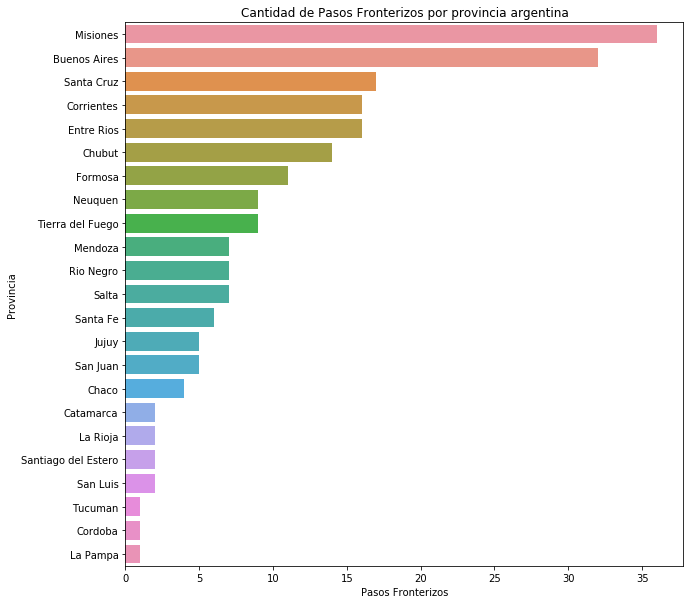

In [27]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='province',data=pasos_f,order=pasos_f["province"].value_counts().index)
ax.set_ylabel("Provincia")
ax.set_xlabel("Pasos Fronterizos")
ax.set_title("Cantidad de Pasos Fronterizos por provincia argentina");